# Install and Import Dependencies

In [3]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu


In [4]:
!git clone https://github.com/ultralytics/yolov5
    

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
cd yolov5

/home/vishu/Documents/Python Projects/Driver-sleepiness-detection-application-/yolov5


In [6]:
pip install -r requirements.txt 

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/vishu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-27 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Make Detections

In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1730.4ms pre-process, 162.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


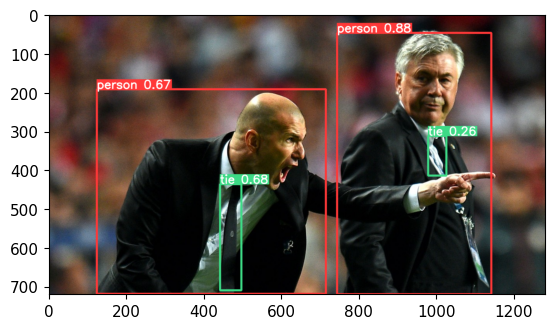

In [12]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

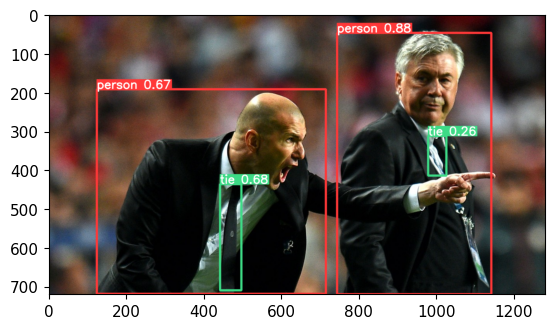

In [13]:
plt.imshow(np.squeeze(results.render()))


In [14]:
img1 = 'https://media.wired.com/photos/593256b42a990b06268a9e21/master/pass/traffic-jam-getty.jpg'

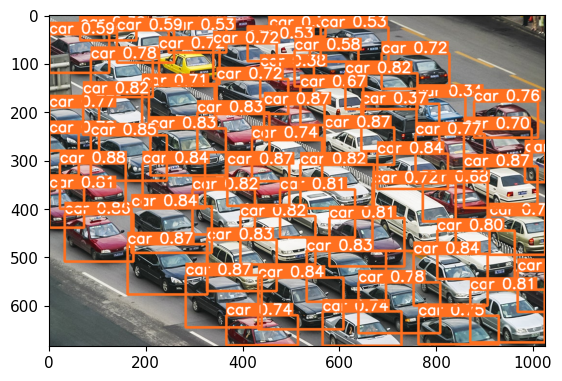

image 1/1: 684x1025 61 cars
Speed: 1253.1ms pre-process, 688.3ms inference, 78.1ms NMS per image at shape (1, 3, 448, 640)


In [77]:
results = model(img1)
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()
results.print()


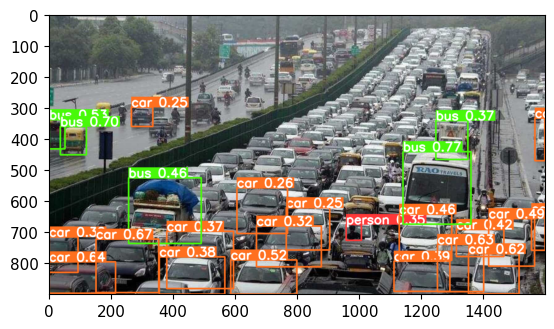

image 1/1: 900x1598 1 person, 18 cars, 5 buss
Speed: 498.5ms pre-process, 139.1ms inference, 1.8ms NMS per image at shape (1, 3, 384, 640)


In [16]:
img3 = 'https://images.livemint.com/img/2022/10/16/1600x900/traffic_1665906143636_1665906143765_1665906143765.jpg'

results = model(img3)
plt.imshow(np.squeeze(results.render()))
plt.show()

results.print()

# Real Time Detection

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    
    
    # Make Detections
    results = model(frame)
    
    cv2.imshow('DROWSINESS DETECTION', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
    
cv2.destroyAllWindows()
    

# Training From Scratch

In [18]:
import uuid # unique Identifier
import os
import time
import cv2

In [46]:
Images_path = os.path.join("data","images")
Labels_path = os.path.join("data","labels")
labels = ["awake","drowsy"]
number_of_images = 40

if(not os.path.exists(Images_path)):
    os.makedirs(Images_path)
    
if(not os.path.exists(Labels_path)):
    os.makedirs(Labels_path)


In [27]:
# Capturing Images

cap=cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    
    
    for image_num in range(number_of_images):
        print("Collecting images for {}, image number {}".format(label,image_num))
        
        ret,frame = cap.read()
        
        img_name = os.path.join(Images_path,label + '.' + str(uuid.uuid1()) + '.jpg')
         
        cv2.imwrite(img_name,frame)
        
        cv2.imshow('Image Collection',frame)
        
        #delay between the image captures of 2 seconds
        time.sleep(2)     
        
        if(cv2.waitKey(1)==13):
            break
            
cap.release()
cv2.destroyAllWindows()

In [30]:
print(os.path.join(Images_path ,labels[0] + '.' + str(uuid.uuid1()) + '.jpg'))

data/images/awake.43182cd4-9e25-11ed-be6c-398d52b6244e.jpg


In [31]:
for label in labels:
    print (label)
    for image_num in range(number_of_images):
        print('Collecting Images for {}, image number {}'.format(label, image_num))
        imgname = os.path.join(Images_path, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

awake
data/images/awake.45af25ba-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25bb-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25bc-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25bd-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25be-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25bf-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c0-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c1-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c2-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c3-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c4-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c5-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c6-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c7-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c8-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25c9-9e25-11ed-be6c-398d52b6244e.jpg
data/images/awake.45af25ca-9e25-11ed-be6c-398d52b6

In [ ]:
cd Documents/Python Projects/Driver-sleepiness-detection-application-



# For Labelling Images

In [36]:
!git clone https://github.com/heartexlabs/labelImg.git


Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 321.00 KiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [37]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 553.8 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 476.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 569.9 kB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 kB 820.9 kB/s eta 0:00:00m eta 0:00:010:00:01


In [56]:
!pip install labelImg

Defaulting to user installation because normal site-packages is not writeable


# label the images by opning the data/images directory and saving the labels in data/labels directory and save the labels for yolo

In [67]:
!labelImg

In [69]:
import yaml
d={'path':'../data','train':'images','val':'images', 'names':{ 0:'awake', 1:'drowsy'}}
with open('dataset.yml', 'w') as yaml_file:
    yaml.dump(d,yaml_file,default_flow_style=False)

In [96]:
!python3 yolov5/train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirement "opencv-python>=4.1.1" not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.7.0.68-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)

requirements: 1 package updated per /home/vishu/Documents/